# Cross Section vs Energy

_Authors: Jurjan Bootsma, Bouke Jung, Maarten de Jong_

This notebook tries to find out more about the cross section vs the energy. This first part reads the data and plots the cross section against the energy.

In [42]:
import matplotlib.pyplot as plt
import numpy as np

import km3pipe as kp
import km3modules as km
import km3io
from km3net_testdata import data_path
from particle import Particle

In [43]:
#Reading the data
filename = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_1-100GeV.115.root"
f = km3io.OfflineReader(data_path(filename))


In [44]:
def get_masses(mc_tracks):
    pdg_ids = mc_tracks.pdgid
    masses = np.zeros((len(pdg_ids),np.max(ak.num(pdgids))))
    i=0
    for pdg in pdg_ids:
        p = Particle.from_pdgid(pdg)
        mass = p.mass
        if mass == None:
            mass = 0
        masses[i]=mass
        i=i+1
    return masses

In [45]:
def get_momentum(mc_tracks):
    mass_lepton = Particle.from_pdgid(13).mass * 10**-3
    E_lepton = mc_tracks.E[:,2]
    momentum_lepton = np.sqrt(E_lepton**2 - mass_lepton**2)
    return mc_tracks.E[:,0],momentum_lepton

In [46]:
#Extracting the needed information
cross_section = f.w2list[:,2]
energies = f.mc_tracks.E[:,0]
interaction_channel = f.w2list[:,9]

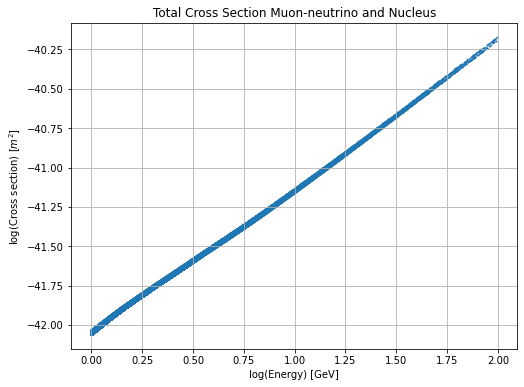

In [47]:
plt.figure(figsize=(8,6))
plt.title("Total Cross Section Muon-neutrino and Nucleus")
plt.scatter(np.log10(energies), np.log10(cross_section), s=0.5)
plt.grid()
plt.xlabel("log(Energy) [GeV]")
plt.ylabel("log(Cross section) [$m^2$]")
plt.show()

# Cross Section/Energy vs Energy

The next plots show the cross section divided by the energy to find out more about the cross section. Here you can see that there seem to be 2 or 3 different distributions (that while this only focusses on normal particles, not anti, in NC, not CC). It could be that this is because of some rounding effect.

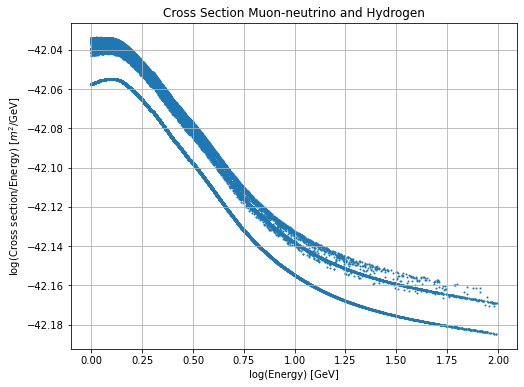

In [48]:
fig=plt.figure(figsize=(8,6))
plt.title("Cross Section Muon-neutrino and Hydrogen")
plt.scatter(np.log10(energies), np.log10(cross_section/energies), s=1)
plt.grid()
plt.xlabel("log(Energy) [GeV]")
plt.ylabel("log(Cross section/Energy) [$m^2$/GeV]")
plt.show()



# Different Interaction Processes: Fractions

This part focuses on the different interaction processes and how dominant they are as a function of energy.

In [49]:
Emax = 2
binsize = 0.1
energies_bin = np.logspace(0,Emax,base=10,num=int(Emax/binsize))
i = 0
j = 0
channels1 = np.zeros((int(Emax/binsize)))
channels2 = np.zeros((int(Emax/binsize)))
channels3 = np.zeros((int(Emax/binsize)))
while j < Emax/binsize:
    boolean_bin = (np.log10(energies) > i) * (np.log10(energies) < i+0.1)
    channel_all = np.sum(boolean_bin)
    channel1 = np.sum(boolean_bin*interaction_channel == 1)
    channel2 = np.sum(boolean_bin*interaction_channel == 3)
    channel3 = np.sum(boolean_bin*interaction_channel == 4)
    channels1[j] = channel1/channel_all
    channels2[j] = channel2/channel_all
    channels3[j] = channel3/channel_all
    
    
    i = i+binsize
    j = j+1



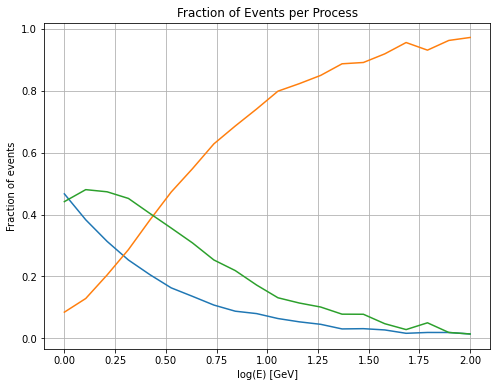

In [50]:
plt.figure(figsize=(8,6))
plt.title("Fraction of Events per Process")
plt.plot(np.log10(energies_bin),channels1)
plt.plot(np.log10(energies_bin),channels2)
plt.plot(np.log10(energies_bin),channels3)
plt.xlabel("log(E) [GeV]")
plt.ylabel("Fraction of events")
plt.grid()
plt.show()

# Different Interaction Processes: Cross Sections

This part uses the fractions and the total cross sections to find the cross section divided by the energy for the different processes.

$$\sigma_{process} = f * \sigma_{total}$$

In [51]:
#Now with cross sections
Emax = 2
binsize = 0.1
energies_bin = np.logspace(0,Emax,base=10,num=int(Emax/binsize))
i = 0
j = 0
channels1 = np.zeros((int(Emax/binsize)))
channels2 = np.zeros((int(Emax/binsize)))
channels3 = np.zeros((int(Emax/binsize)))
cross_section_bin = np.zeros((int(Emax/binsize)))
while j < Emax/binsize:
    boolean_bin = (np.log10(energies) > i) * (np.log10(energies) < i+binsize)
    channel_all = np.sum(boolean_bin)
    channel1 = np.sum(boolean_bin*interaction_channel == 1)
    channel2 = np.sum(boolean_bin*interaction_channel == 3)
    channel3 = np.sum(boolean_bin*interaction_channel == 4)
    channels1[j] = channel1/channel_all
    channels2[j] = channel2/channel_all
    channels3[j] = channel3/channel_all
    
    #Cross section part
    cross_section_bin[j] = np.mean(cross_section[boolean_bin])
    
    i = i+binsize
    j = j+1

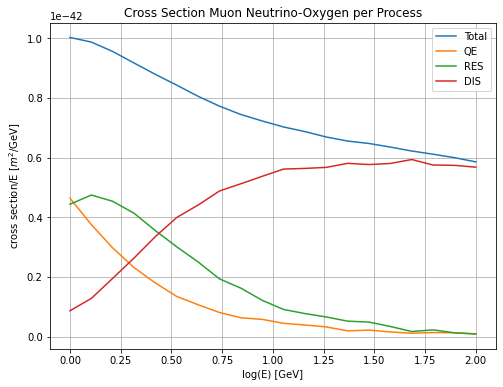

In [52]:
plt.figure(figsize=(8,6))
plt.title("Cross Section Muon Neutrino-Oxygen per Process")
plt.plot(np.log10(energies_bin),(cross_section_bin_O)/energies_bin, label="Total")
plt.plot(np.log10(energies_bin),(channels1_O*cross_section_bin_O)/energies_bin, label="QE")
plt.plot(np.log10(energies_bin),(channels3_O*cross_section_bin_O)/energies_bin, label="RES")
plt.plot(np.log10(energies_bin),(channels2_O*cross_section_bin_O)/energies_bin, label="DIS")
plt.xlabel("log(E) [GeV]")
plt.ylabel("cross section/E [$m^2$/GeV]")
plt.grid()
plt.legend()
plt.show()